In [1]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

**Simple Example**

compare to ML and the physical world course on git (i think its there).

GOAL:
use GP (gaussian processes) to generate changing functions on a device to get something like creativity and/or variety.

PROBLEM:
circuit python does not contain the used imports. We need a reimplementation based on ulab and basic python or to compile our own circuit python (or micropython) version containing those imports.

In [2]:
# different kernel functions

def rbf_kernel(x1, x2, varSigma, lengthscale, noise):
    #x1 = np.squeeze(x1)
    #x2 = np.squeeze(x2)
    if x2 is None:
        d = cdist(x1, x1) # euklidischer abstand sqrt( sum( ( x-xi )**2 ) )
    else:
        d = cdist(x1, x2)
    K = varSigma*np.exp(-np.power(d, 2)/lengthscale)
    return K

def lin_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*x1.dot(x1.T)
    else:
        return varSigma*x1.dot(x2.T)

def white_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*np.eye(x1.shape[0])
    else:
        return np.zeros(x1.shape[0], x2.shape[0])

def periodic_kernel(x1, x2, varSigma, period, lenthScale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    return varSigma*np.exp(-(2*np.sin((np.pi/period)*np.sqrt(d))**2)/lengthScale**2)

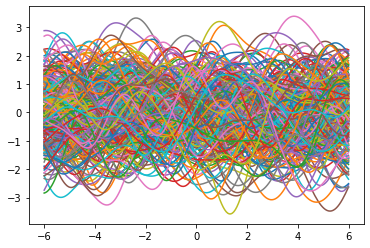

In [4]:
# choose index set for the marginal
x = np.linspace(-6, 6, 200).reshape(-1, 1)
#y = np.linspace(-5, 5, 200).reshape(-1, 1)
#X,Y = np.meshgrid(x,y)
# compute covariance matrix
K = rbf_kernel(x, None, 1.0, 2.0, 0)
#K = lin_kernel(x, None, 2.0)
#K = white_kernel(x, None, 2.0)
# create mean vector
mu = np.squeeze(np.zeros(x.shape))
# draw samples 20 from Gaussian distribution
f = np.random.multivariate_normal(mu, K, 300).T
#print(mu)
#print(K)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f)
plt.show()
plt.close()

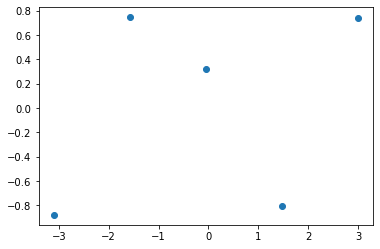

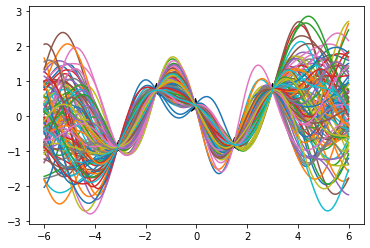

In [8]:
# generate random data points

N = 5
# x,y,x1,y1 have the length N
x = np.linspace(-3.1,3,N)
y = np.sin(2*np.pi/x) + x*0.1 + 0.3*np.random.randn(x.shape[0])
x1 = np.reshape(x,(-1,1))
y1 = np.reshape(y,(-1,1))
# x_star has the length 500...
x_star = np.linspace(-6, 6, 500).reshape(-1, 1)
plt.scatter(x,y)
plt.savefig("gp/exmpl_data.png")
plt.show()

# gaussian process for prediction

def gp_prediction(x1, y1, xstar, lengthScale, varSigma, noise):
    k_starX = rbf_kernel(xstar,x1,lengthScale,varSigma,noise)
    k_xx = rbf_kernel(x1, None, lengthScale, varSigma, noise)
    k_starstar = rbf_kernel(xstar,None,lengthScale,varSigma,noise)
    mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y1)
    var = k_starstar - (k_starX).dot(np.linalg.inv(k_xx)).dot(k_starX.T)
    return mu, var, xstar

# predict... i.e. generate functions that pass the generated datapoints

Nsamp = 100
#mu_star, var_star, x_star = gp_prediction(x1, y1, x, lengthScale, varSigma, noise)
mu_star, var_star, x_star = gp_prediction(x1, y1, x_star, 1, 2, 1)
mu_star = np.squeeze(mu_star)
f_star = np.random.multivariate_normal(mu_star, var_star, Nsamp)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_star, f_star.T)
ax.scatter(x1, y1, 200, 'k', '*', zorder=2)
plt.savefig("gp/exmpl_fun.png")